In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
data = pd.read_csv('data\Tumeurs_data_stabled.csv')

In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()
columns_X = X.columns

In [5]:
X.shape

(770, 784)

In [6]:
X = X/255

In [7]:
X = np.array(X)
X = X.reshape(len(X) ,28,28,1)

#X = X.reshape(len(data_stabled),784)

#Scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y )

X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=1)


In [8]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [9]:
model =tf.keras.models.Sequential([
    #tf.keras.layers.GaussianBlur(sigma=(0, 3.0)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    #tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    #
    # tf.keras.layers.BatchNormalization(),
  
    
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.15), #Important parameter
    # tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.GlobalAveragePooling2D(),
    
    #tf.keras.layers.Dense(units = 256, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 128, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(), #Convert 3d in 1d features vectors 
    #tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7,activation = "softmax")])

In [10]:
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks = [early], validation_data=(X_val, y_val))
#history = model.fit(X_train, y_train, epochs=100,callbacks = [early])

Epoch 1/100


c:\Users\mathi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


7/7 [==============================] - 1s 33ms/step - loss: 2.0057 - accuracy: 0.2077 - val_loss: 1.9604 - val_accuracy: 0.0833
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 1.8901 - accuracy: 0.1981 - val_loss: 1.9524 - val_accuracy: 0.0833
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 1.7796 - accuracy: 0.2560 - val_loss: 1.9526 - val_accuracy: 0.0833
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 1.7730 - accuracy: 0.2657 - val_loss: 1.9596 - val_accuracy: 0.0833
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 1.6883 - accuracy: 0.3043 - val_loss: 1.9489 - val_accuracy: 0.1250
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 1.6773 - accuracy: 0.3140 - val_loss: 1.9531 - val_accuracy: 0.1250
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 1.5933 - accuracy: 0.3768 - val_loss: 1.9748 - val_accuracy: 0.0833
Epoch 8/100
7/7 [===============

In [11]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

8/8 [==============================] - 0s 4ms/step - loss: 1.1668 - accuracy: 0.7229
Test Accuracy: 72.294%


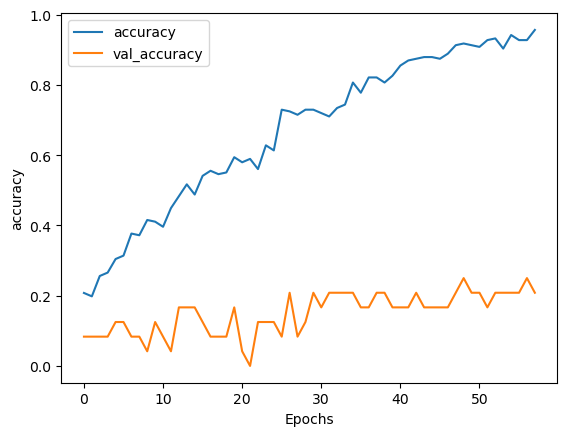

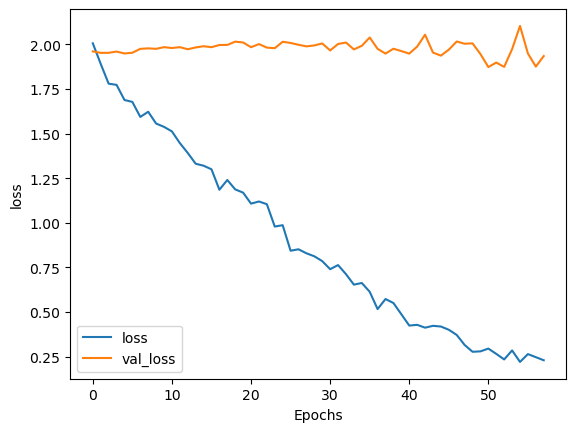

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.42      0.97      0.59        31
           2       0.93      0.87      0.90        30
           3       0.71      0.91      0.80        35
           4       0.80      0.40      0.53        30
           5       1.00      0.58      0.74        43
           6       1.00      0.40      0.57        30

    accuracy                           0.72       231
   macro avg       0.82      0.72      0.72       231
weighted avg       0.82      0.72      0.72       231



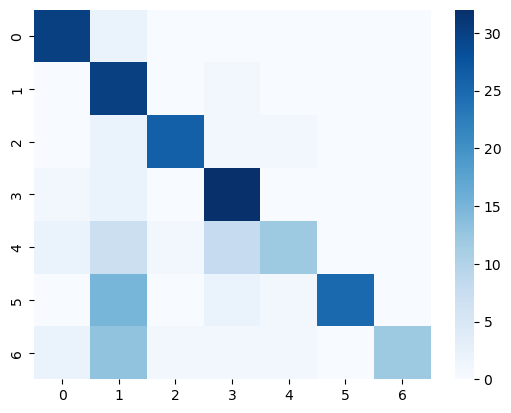

In [13]:
y_true = np.array(y_test)

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())
import seaborn as sn

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr2 = classification_report(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, cmap='Blues')
print(cr2)
#print(cm) 